In [ ]:
"""
Leveraging Machine Learning for Air Quality Prediction in Philippine Cities: 2025 AQI Data

    Members:
    Cabacang
    Guerrero
    Pineda
    Villanueva
"""

In [59]:
# import kagglehub
# import os
# import shutil

# # Define the path where you want to download the dataset
# desired_path = "C:/repos/ECDS-NeuralNets/Day 1/Dataset"

# # Check if the directory exists, if not create it
# if not os.path.exists(desired_path):
#     os.makedirs(desired_path)

# # Download latest version (it will download to the default location)
# default_path = kagglehub.dataset_download("iammustafatz/diabetes-prediction-dataset")

# # Move the downloaded files to your desired directory
# shutil.move(default_path, desired_path)

# print(desired_path)

In [3]:
# Let's check and see the data
import pandas as pd
data = pd.read_csv(r'202501_CombinedData.csv')
data

,datetime,air_quality_index,carbon_monoxide.co,nitric_oxide.no,nitrogen_dioxide.no2,ozone.o3,sulfur_dioxide_so2\t,Particulate_Matter2.5,Particulate_Matter10,ammonia_nh3,longitude,latitude,extraction_date_time,city_name
0,2025-01-01 00:00:00+08:00,2,367.17,0.00,2.10,67.95,0.80,13.40,15.15,1.95,119.9811,16.1561,2025-01-01 00:00:00.605848+08:00,Alaminos
1,2025-01-01 00:00:03+08:00,2,594.14,0.05,11.82,11.44,2.12,14.98,19.22,4.02,120.5833,15.1500,2025-01-01 00:00:03.296877+08:00,Angeles City
2,2025-01-01 00:00:05+08:00,1,327.11,0.00,3.13,32.90,0.51,5.38,6.57,1.69,121.1900,15.6181,2025-01-01 00:00:05.509106+08:00,Antipolo
3,2025-01-01 00:00:06+08:00,1,208.62,0.00,1.15,37.91,2.74,3.25,3.49,0.25,123.5085,12.2285,2025-01-01 00:00:06.987476+08:00,Bacolod
4,2025-01-01 00:00:09+08:00,3,1588.82,11.40,50.72,0.00,30.52,46.08,69.62,9.63,120.9290,14.4590,2025-01-01 00:00:09.198975+08:00,Bacoor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35875,2025-01-22 12:04:18+08:00,1,211.95,0.13,0.78,41.13,0.41,1.96,2.60,0.70,124.5725,11.1089,2025-01-22 12:04:18.781988+08:00,Valencia
35876,2025-01-22 12:04:20+08:00,2,303.75,0.20,4.16,83.69,4.65,3.44,7.12,2.06,120.9667,14.7000,2025-01-22 12:04:20.873848+08:00,Valenzuela
35877,2025-01-22 12:04:23+08:00,1,195.27,0.07,0.41,45.78,0.69,2.08,3.29,0.24,123.0778,10.9000,2025-01-22 12:04:23.144700+08:00,Victorias
35878,2025-01-22 12:04:24+08:00,2,273.71,0.04,0.30,70.10,0.33,3.57,4.75,1.27,120.3869,17.5747,2025-01-22 12:04:24.959769+08:00,Vigan


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35880 entries, 0 to 35879
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   datetime               35880 non-null  object 
 1   air_quality_index      35880 non-null  int64  
 2   carbon_monoxide.co     35880 non-null  float64
 3   nitric_oxide.no        35880 non-null  float64
 4   nitrogen_dioxide.no2   35880 non-null  float64
 5   ozone.o3               35880 non-null  float64
 6   sulfur_dioxide_so2	    35880 non-null  float64
 7   Particulate_Matter2.5  35880 non-null  float64
 8   Particulate_Matter10   35880 non-null  float64
 9   ammonia_nh3            35880 non-null  float64
 10  longitude              35880 non-null  float64
 11  latitude               35880 non-null  float64
 12  extraction_date_time   35880 non-null  object 
 13  city_name              35880 non-null  object 
dtypes: float64(10), int64(1), object(3)
memory usage: 3.8+

In [5]:
data.describe()

,air_quality_index,carbon_monoxide.co,nitric_oxide.no,nitrogen_dioxide.no2,ozone.o3,sulfur_dioxide_so2\t,Particulate_Matter2.5,Particulate_Matter10,ammonia_nh3,longitude,latitude
count,35880.000000,35880.000000,35880.000000,35880.000000,35880.000000,35880.000000,35880.00000,35880.000000,35880.000000,35880.000000,35880.000000
mean,1.608501,373.345931,0.602237,6.223254,48.495335,3.880995,8.49669,11.324795,2.854601,122.524401,12.551157
std,0.701132,312.309875,4.175289,10.390073,27.147970,7.163905,11.77040,15.266320,4.390165,1.730652,3.182217
min,1.000000,153.540000,0.000000,0.080000,0.000000,0.030000,0.50000,0.520000,0.000000,118.733300,6.087200
25%,1.000000,233.650000,0.000000,1.160000,29.330000,0.510000,3.04000,4.020000,0.570000,120.966700,10.106100
50%,2.000000,287.060000,0.010000,2.640000,47.920000,1.280000,5.26500,6.980000,1.460000,122.492350,13.383450
75%,2.000000,383.850000,0.110000,6.770000,66.520000,3.930000,9.23000,12.740000,3.290000,123.890700,14.767800
max,5.000000,4646.300000,92.980000,132.980000,394.820000,96.320000,190.39000,226.190000,52.690000,126.198600,18.198900


air_quality_index
1    17341
2    16207
3     1659
4      384
5      289
Name: count, dtype: int64


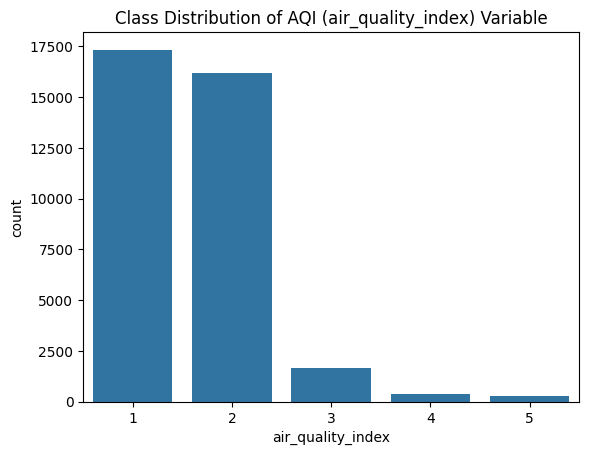

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
print(data['air_quality_index'].value_counts())
# Visualize the distribution of the target variable
sns.countplot(x='air_quality_index', data=data)
plt.title('Class Distribution of AQI (air_quality_index) Variable')
plt.show()

In [7]:
dupes = data[data.duplicated()]
dupes_sum = data.duplicated().sum() 
print("sum of duplicated rows:", dupes_sum)
print("duplicated rows:", dupes)

sum of duplicated rows: 0
duplicated rows: Empty DataFrame
Columns: [datetime, air_quality_index, carbon_monoxide.co, nitric_oxide.no, nitrogen_dioxide.no2, ozone.o3, sulfur_dioxide_so2	, Particulate_Matter2.5, Particulate_Matter10, ammonia_nh3, longitude, latitude, extraction_date_time, city_name]
Index: []


In [8]:
# Filter the dataset for rows where the target is equal to a specific value (e.g., 1)
target_value = 3
subset = data[data['air_quality_index'] == target_value]

# Check for duplicates in the subset
duplicates_in_target_value = subset[subset.duplicated(keep=False)]

# Display duplicates
print("Dupes Counter with AQI Variable = 1:", len(duplicates_in_target_value))
print(f"Duplicates for target value {target_value}:")
duplicates_in_target_value

Dupes Counter with AQI Variable = 1: 0
Duplicates for target value 3:


,datetime,air_quality_index,carbon_monoxide.co,nitric_oxide.no,nitrogen_dioxide.no2,ozone.o3,sulfur_dioxide_so2\t,Particulate_Matter2.5,Particulate_Matter10,ammonia_nh3,longitude,latitude,extraction_date_time,city_name


In [9]:
# inplace=True: Makes the change directly in the original DataFrame without needing to reassign it.
data_deduped = data.drop_duplicates(inplace=True)
print(data.duplicated().sum())
data[data.duplicated()]

0


,datetime,air_quality_index,carbon_monoxide.co,nitric_oxide.no,nitrogen_dioxide.no2,ozone.o3,sulfur_dioxide_so2\t,Particulate_Matter2.5,Particulate_Matter10,ammonia_nh3,longitude,latitude,extraction_date_time,city_name


air_quality_index
1    17341
2    16207
3     1659
4      384
5      289
Name: count, dtype: int64


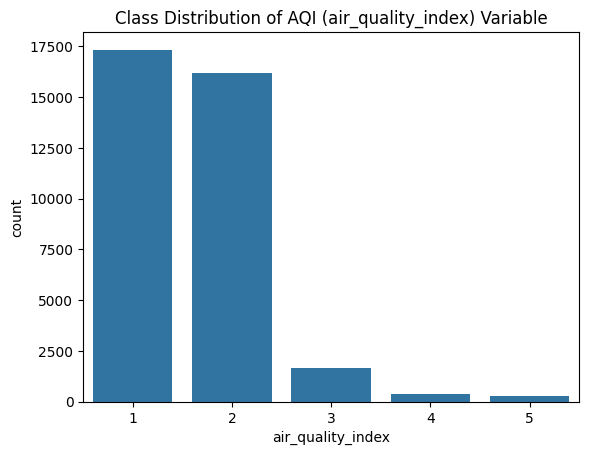

In [10]:
# Now let's check again the distribution after deduplication
print(data['air_quality_index'].value_counts())
# Visualize the distribution of the target variable
sns.countplot(x='air_quality_index', data=data)
plt.title('Class Distribution of AQI (air_quality_index) Variable')
plt.show()

### We can see that after deduplication, still the second class of the target variable is largely imbalanced from the other one. We are dealing with extreme class imbalance.

In [11]:
# Let's conduct an undersampling method to balance out our data
from imblearn.under_sampling import RandomUnderSampler
X = data.drop('air_quality_index', axis=1)
y = data['air_quality_index']
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

air_quality_index
1    289
2    289
3    289
4    289
5    289
Name: count, dtype: int64


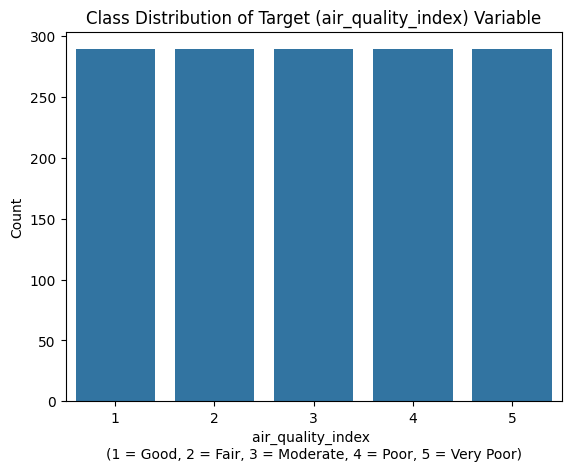

In [12]:
# Check the distribution of the resampled target variable
print(y_resampled.value_counts())

# Visualize the distribution of the resampled target variable
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y_resampled)
plt.title('Class Distribution of Target (air_quality_index) Variable')
plt.xlabel('air_quality_index \n(1 = Good, 2 = Fair, 3 = Moderate, 4 = Poor, 5 = Very Poor)')
plt.ylabel('Count')
plt.show()


### **Advantages of Undersampling:**
Simplicity:<br>It’s easy to implement and understand.
Reduced Overfitting:<br>No synthetic data means less risk of overfitting to artificial patterns.
Lower Computational Cost:<br>Smaller datasets mean faster training.
### **Potential Drawbacks:**
Loss of Information:<br>You discard a significant amount of the majority class data, which could result in losing valuable patterns.
Less Effective for Complex Data:<br>If the majority class has complex structure, undersampling may miss important nuances.
### **When Undersampling is a Good Choice:**
Large Majority Class:<br>If you have a massive majority class, removing data is feasible.
Fast Prototyping:<br>Useful when you want quick results without complex tuning.
Balanced Complexity:<br>Works well when the minority class is distinct and well-separated.


In [13]:
# Concatenate the resampled features and target variable to form a new dataframe
data_resampled = pd.concat([X_resampled, y_resampled], axis=1)

# Check the first few rows of the resampled data
data_resampled

,datetime,carbon_monoxide.co,nitric_oxide.no,nitrogen_dioxide.no2,ozone.o3,sulfur_dioxide_so2\t,Particulate_Matter2.5,Particulate_Matter10,ammonia_nh3,longitude,latitude,extraction_date_time,city_name,air_quality_index
1788,2025-01-02 00:04:13+08:00,494.00,0.00,10.28,36.48,1.54,7.69,8.63,2.63,120.5711,15.9761,2025-01-02 00:04:13.899976+08:00,Urdaneta,1
16609,2025-01-11 00:01:32+08:00,247.00,0.00,2.40,37.91,1.00,2.89,3.37,0.92,123.3081,9.3103,2025-01-11 00:01:32.604161+08:00,Dumaguete,1
2401,2025-01-02 10:01:47+08:00,223.64,0.06,1.59,20.56,0.19,2.53,2.77,0.63,125.1167,8.8333,2025-01-02 10:01:47.547087+08:00,Gingoog City,1
24211,2025-01-15 12:01:55+08:00,243.66,0.09,0.51,55.79,5.60,6.72,9.27,0.55,123.4167,13.4167,2025-01-15 12:01:55.132574+08:00,Iriga City,1
27906,2025-01-17 18:01:00+08:00,250.34,0.05,3.90,41.84,0.95,2.61,3.81,2.22,123.1964,10.3864,2025-01-17 18:01:00.631288+08:00,Canlaon,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35726,2025-01-22 10:03:57+08:00,3044.13,27.05,90.48,55.79,48.16,91.34,117.80,24.83,121.0792,14.5243,2025-01-22 10:03:57.868867+08:00,Taguig,5
35746,2025-01-22 12:00:09+08:00,1321.79,1.03,21.42,246.05,25.99,67.87,89.12,12.16,120.9290,14.4590,2025-01-22 12:00:09.729037+08:00,Bacoor,5
35777,2025-01-22 12:01:13+08:00,1321.79,1.03,21.42,246.05,25.99,67.87,89.12,12.16,120.9169,14.4825,2025-01-22 12:01:13.442467+08:00,Cavite City,5
35802,2025-01-22 12:01:59+08:00,1321.79,1.03,21.42,246.05,25.99,67.87,89.12,12.16,120.9367,14.4297,2025-01-22 12:01:59.658476+08:00,Imus,5


In [14]:
# Check class distribution of the target variable 'air_quality_index'
class_distribution = data_resampled['air_quality_index'].value_counts(normalize=True)
print(class_distribution)

air_quality_index
1    0.2
2    0.2
3    0.2
4    0.2
5    0.2
Name: proportion, dtype: float64


In [15]:
print(data_resampled['air_quality_index'].unique())

[1 2 3 4 5]


# Types of Encoding in Machine Learning

Encoding categorical variables is a crucial step in preparing data for machine learning models. Below are the most common encoding techniques, when to use them, and how they can benefit models, especially in cases with non-normally distributed data.

## 1. **Label Encoding**
- **Description**: Converts each unique category in a column into a numerical label (integer). For example, a column with categories like `['Male', 'Female', 'Other']` could be encoded as `[0, 1, 2]`.
- **When to Use**:
  - Works well for ordinal data (categories with a meaningful order).
  - Use when the model can interpret categorical variables as ordered.
- **Best for**:
  - Decision trees, random forests, and gradient boosting models.
  - Ordinal variables (e.g., `low`, `medium`, `high`).
- **Benefit for Non-Normally Distributed Data**:
  - Label encoding doesn’t distort the relationships between categories by converting them into integers, making it more appropriate for some non-normally distributed datasets where the range and relationships are meaningful.

## 2. **One-Hot Encoding**
- **Description**: Creates a binary column for each category in the original variable. Each row has a `1` in the column corresponding to its category, and `0` in others.
  - Example: If you have the categories `['Male', 'Female', 'Other']`, one-hot encoding will create three columns: `Male`, `Female`, `Other`, where each row has one `1` and the rest are `0`.
- **When to Use**:
  - Best for nominal data (categories without any inherent order).
  - Useful when the categories do not have a natural ranking.
- **Best for**:
  - Linear models, neural networks, and algorithms that can interpret binary features (e.g., logistic regression, support vector machines, etc.).
  - Avoid multicollinearity by using the `drop_first=True` option.
- **Benefit for Non-Normally Distributed Data**:
  - One-hot encoding is particularly effective for categorical variables in datasets that are not normally distributed. By transforming each category into a separate binary feature, it allows models to learn from each distinct category without assuming any numerical relationship, which is crucial in the absence of normal distribution.

## 3. **Ordinal Encoding**
- **Description**: Similar to label encoding, but specifically used for ordinal data where there is a natural order (e.g., `low`, `medium`, `high`).
- **When to Use**:
  - When categories have an inherent order.
  - Avoids the risk of treating categories as unrelated as with one-hot encoding.
- **Best for**:
  - Decision trees and models that can handle ordinal relationships.
  - Models where the order of categories has meaning.
- **Benefit for Non-Normally Distributed Data**:
  - Ordinal encoding respects the natural order of data and does not assume the data follows any normal distribution. This is beneficial in datasets with skewed or non-normal distributions, where the relationship between categories and the target is more important than distributional assumptions.

## 4. **Binary Encoding**
- **Description**: Combines the benefits of both label encoding and one-hot encoding. It converts categories into binary digits. This method is more compact and efficient than one-hot encoding.
- **When to Use**:
  - When there are a large number of categories, and one-hot encoding would lead to too many columns (high cardinality).
  - Suitable when reducing dimensionality is necessary.
- **Best for**:
  - High-cardinality categorical features, such as product IDs, zip codes, etc.
  - Algorithms like XGBoost and LightGBM, which can handle the binary features effectively.
- **Benefit for Non-Normally Distributed Data**:
  - For datasets with high cardinality and skewed distributions, binary encoding reduces the number of features while retaining the categorical information. This helps models avoid overfitting to noise in non-normally distributed data.

## Choosing the Best Encoding Method

- **For Ordinal Data**: Use **Label Encoding** or **Ordinal Encoding** since there is an inherent order to the categories.
- **For Nominal Data with Few Categories**: Use **One-Hot Encoding** as it is straightforward and widely accepted in most models.
- **For High Cardinality Data**: Use **Binary Encoding** or **Frequency Encoding** to reduce dimensionality and prevent the curse of dimensionality.
- **For High Cardinality with Strong Target Relationships**: Use **Target Encoding** when there is a strong correlation between categorical values and the target variable.
- **For Non-Normally Distributed Data**: Encoding methods like **Target Encoding**, **Binary Encoding**, and **Frequency Encoding** can be particularly effective, as they focus on the actual relationships and frequencies rather than assuming normality in the data.


In [16]:
from sklearn.preprocessing import OrdinalEncoder

# Define the ordinal category order for air quality index (assuming higher is worse)
air_quality_mapping = [1, 2, 3, 4, 5, 6]  # AQI levels in ascending order

# Apply ordinal encoding
encoder = OrdinalEncoder(categories=[air_quality_mapping])
data["air_quality_index_encoded"] = encoder.fit_transform(data[["air_quality_index"]])

# Display the updated DataFrame with the encoded column
print(data[["air_quality_index", "air_quality_index_encoded"]].head())


   air_quality_index  air_quality_index_encoded
0                  2                        1.0
1                  2                        1.0
2                  1                        0.0
3                  1                        0.0
4                  3                        2.0


In [18]:
data.dtypes

datetime                      object
air_quality_index              int64
carbon_monoxide.co           float64
nitric_oxide.no              float64
nitrogen_dioxide.no2         float64
ozone.o3                     float64
sulfur_dioxide_so2\t         float64
Particulate_Matter2.5        float64
Particulate_Matter10         float64
ammonia_nh3                  float64
longitude                    float64
latitude                     float64
extraction_date_time          object
city_name                     object
air_quality_index_encoded    float64
dtype: object

In [19]:
# Convert any boolean columns to integers (True = 1, False = 0)
boolean_columns = data.select_dtypes(include=['bool']).columns
for col in boolean_columns:
    data[col] = data[col].astype(int)
# Check the result to see if it properly encoded the columns
data["air_quality_index_encoded"] = data["air_quality_index_encoded"].astype(int)
data.head()

,datetime,air_quality_index,carbon_monoxide.co,nitric_oxide.no,nitrogen_dioxide.no2,ozone.o3,sulfur_dioxide_so2\t,Particulate_Matter2.5,Particulate_Matter10,ammonia_nh3,longitude,latitude,extraction_date_time,city_name,air_quality_index_encoded
0,2025-01-01 00:00:00+08:00,2,367.17,0.00,2.10,67.95,0.80,13.40,15.15,1.95,119.9811,16.1561,2025-01-01 00:00:00.605848+08:00,Alaminos,1
1,2025-01-01 00:00:03+08:00,2,594.14,0.05,11.82,11.44,2.12,14.98,19.22,4.02,120.5833,15.1500,2025-01-01 00:00:03.296877+08:00,Angeles City,1
2,2025-01-01 00:00:05+08:00,1,327.11,0.00,3.13,32.90,0.51,5.38,6.57,1.69,121.1900,15.6181,2025-01-01 00:00:05.509106+08:00,Antipolo,0
3,2025-01-01 00:00:06+08:00,1,208.62,0.00,1.15,37.91,2.74,3.25,3.49,0.25,123.5085,12.2285,2025-01-01 00:00:06.987476+08:00,Bacolod,0
4,2025-01-01 00:00:09+08:00,3,1588.82,11.40,50.72,0.00,30.52,46.08,69.62,9.63,120.9290,14.4590,2025-01-01 00:00:09.198975+08:00,Bacoor,2


air_quality_index              int64
carbon_monoxide.co           float64
nitric_oxide.no              float64
nitrogen_dioxide.no2         float64
ozone.o3                     float64
sulfur_dioxide_so2\t         float64
Particulate_Matter2.5        float64
Particulate_Matter10         float64
ammonia_nh3                  float64
longitude                    float64
latitude                     float64
air_quality_index_encoded      int64
dtype: object


/home/oshit0/.virtualenvs/lib/python3.13/site-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/oshit0/.virtualenvs/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


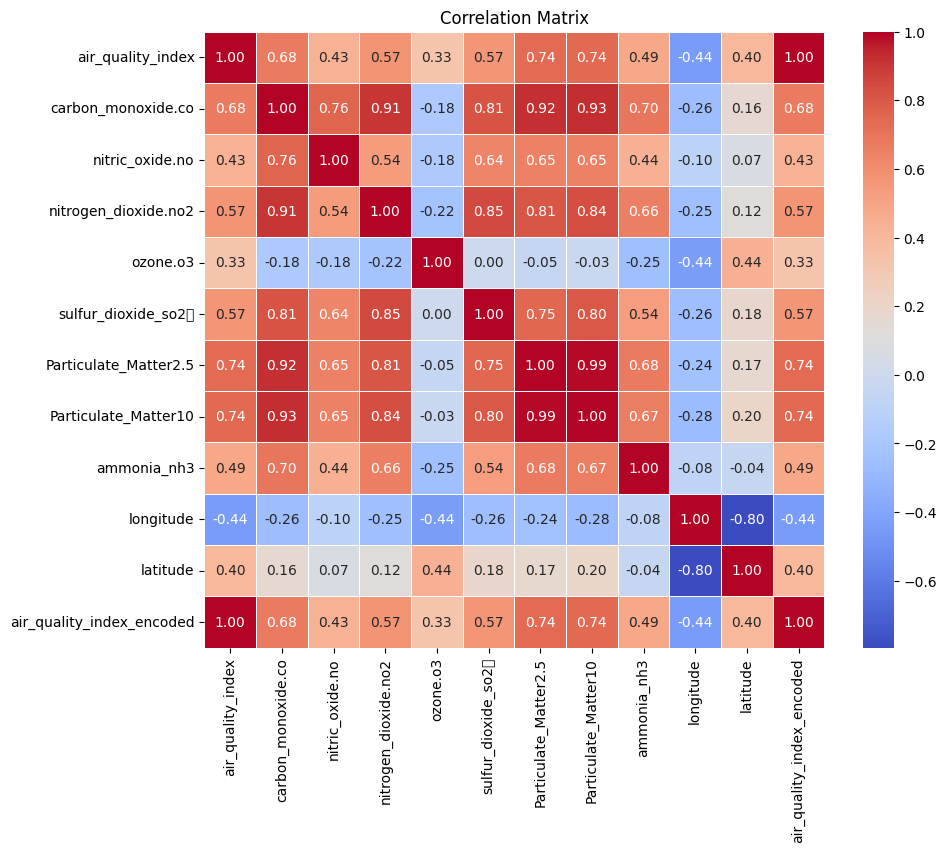

In [20]:
# Drop non-numeric columns explicitly
data_numeric = data.drop(columns=['datetime', 'extraction_date_time', 'city_name'], errors='ignore')

# Ensure only numeric columns remain
print(data_numeric.dtypes)

# Run correlation analysis
correlation_matrix = data_numeric.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Why Perform Correlation Analysis Before Training:

1. **Feature Selection**:  
   Correlation analysis helps identify highly correlated features. If two features are highly correlated (i.e., multicollinearity), it can cause problems in models like linear regression or decision trees because they might "overlap" in terms of information. By removing or combining these features beforehand, you can improve the model's performance and interpretability.

2. **Data Understanding**:  
   Understanding the relationships between features helps in deciding which features are important for your model. It gives insights into the data that can guide feature engineering or preprocessing steps.

3. **Improving Model Efficiency**:  
   Reducing multicollinearity can make your model training more stable, and selecting the most relevant features can improve model performance, especially for algorithms like logistic regression or support vector machines (SVMs).


### Why Low Correlation Is Often Desired:

1. **Avoiding Multicollinearity:**
   - **Multicollinearity** occurs when two or more features are highly correlated with each other. In linear models (like **linear regression**), this can cause problems because the model struggles to distinguish the individual effect of each feature on the target variable. This leads to unstable estimates of coefficients and can make the model's predictions less reliable.
   - For example, if two features, `Height` and `Weight`, are highly correlated, both provide similar information. Including both in the model could inflate variance and lead to overfitting.

2. **Improving Model Interpretability:**
   - When features are highly correlated, it's harder to understand which feature is actually driving the model's predictions. By selecting features that are less correlated, you can more easily interpret the impact of each feature on the outcome.
   - For example, if `Age` and `Years of Experience` are highly correlated, you might want to select one, as both might contribute similar information to the prediction.

3. **Enhancing Model Performance:**
   - Reducing **multicollinearity** can help improve the **accuracy** and **stability** of many machine learning models, such as **logistic regression**, **support vector machines (SVM)**, and others. These models tend to perform better with independent features that provide unique information.
   - For example, **decision trees** and **random forests** can handle correlated features better, but high correlation might still lead to overfitting or redundant information.

4. **Reducing Overfitting:**
   - By eliminating highly correlated features, you reduce the risk of overfitting, where the model memorizes the training data, including noise, instead of generalizing well to new, unseen data.

### How to Handle Correlated Features:

- **Remove one of the correlated features**: If two features are highly correlated (e.g., correlation coefficient > 0.8), you might choose to drop one of them.
- **Feature Engineering**: Combine the correlated features into a new feature that captures the combined information (e.g., averaging the two features or performing dimensionality reduction).
- **Principal Component Analysis (PCA)**: This technique transforms correlated features into a smaller set of uncorrelated features, called principal components, which can help reduce multicollinearity.

### Summary:
- It's generally a good practice to reduce the correlation between features before training, especially when using models sensitive to multicollinearity.
- This leads to better model interpretability, stability, and performance.


### How to Determine if Features Are Highly Correlated

To determine if features are **highly correlated**, you typically calculate the **correlation coefficient** between pairs of features. The correlation coefficient quantifies the strength and direction of the relationship between two variables.

### Steps to Determine High Correlation:

1. **Calculate the Correlation Coefficient:**
   - The most common measure is **Pearson's correlation coefficient** (for continuous variables), which ranges from -1 to 1. <br>
   
The formula for Pearson's correlation coefficient \( r \) is:

$$
r = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2 \sum_{i=1}^{n} (y_i - \bar{y})^2}}
$$

Where:
- $x_i$ and $y_i$ are the individual sample points in datasets $x$ and $y$,
- $\bar{x}$ and $\bar{y}$ are the means of the datasets $x$ and $y$,
- $n$ is the number of data points.

Pearson's correlation coefficient measures the linear relationship between two variables, with values ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation). A value of 0 indicates no linear correlation.
 <br>

   - **+1**: Perfect positive correlation (as one feature increases, the other increases in exact proportion). <br>
   - **-1**: Perfect negative correlation (as one feature increases, the other decreases in exact proportion). <br>
   - **0**: No correlation. <br>
   - **Between 0.5 and 1 (or -0.5 and -1)**: Strong positive (or negative) correlation. <br>
   - **Between 0.3 and 0.5 (or -0.3 and -0.5)**: Moderate correlation. <br>
   - **Below 0.3**: Weak correlation. <br>

2. **Visualize Correlation:**
   - You can visualize the correlation matrix to easily identify which features are highly correlated with each other.

3. **Check the Correlation Matrix:**
   - A **correlation matrix** is a table showing correlation coefficients between many variables. This can be computed for all pairs of features in your dataset.

In [22]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import classification_report

# Split the data into X (features) and y (target)
X = data_numeric.drop(columns=['carbon_monoxide.co']) 
y = data_numeric['air_quality_index_encoded']

# Step 1: Split the data into training and test data (80% training, 20% test) with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


### Standard Scaler Formula

The formula for standard scaling (Z-score normalization) is:

$$
z = \frac{x - \mu}{\sigma}
$$

Where:
- $x$ is an individual data point,
- $ \mu $ is the mean of the data,
- $ \sigma $ is the standard deviation of the data,
- $ z $ is the scaled value (standardized score).

This transformation scales the data so that it has:
- A **mean** of 0,
- A **standard deviation** of 1.

### Significance of Standard Scaling

1. **Normalization for Comparison**: Standard scaling helps bring different features to a comparable scale, especially when the features have different units (e.g., height in cm and weight in kg). This makes sure that no feature dominates due to its scale in models such as linear regression or SVMs.

2. **Improves Model Performance**: Many machine learning algorithms, such as k-nearest neighbors (KNN), support vector machines (SVM), and gradient descent-based algorithms, perform better when the data is standardized. It helps the model converge faster and can lead to better performance.

3. **Ensures Assumptions Hold**: Algorithms like linear regression or logistic regression assume that the data follows a normal distribution. Standard scaling helps make the data more normal (if it isn't already), allowing these algorithms to function as expected.


In [23]:
# Initialize the scaler
scaler = StandardScaler()
# Fit and transform on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Check the shapes of the splits and the class distribution
print(f"Train shape: {X_train_scaled.shape}")
print(f"Test shape: {X_test_scaled.shape}")
print(f"Class distribution in y_train: \n{y_train.value_counts(normalize=True)}")
print(f"Class distribution in y_test: \n{y_test.value_counts(normalize=True)}")

Train shape: (28704, 11)
Test shape: (7176, 11)
Class distribution in y_train: 
air_quality_index_encoded
0    0.483312
1    0.451714
2    0.046230
3    0.010695
4    0.008048
Name: proportion, dtype: float64
Class distribution in y_test: 
air_quality_index_encoded
0    0.483278
1    0.451644
2    0.046265
3    0.010730
4    0.008082
Name: proportion, dtype: float64


📌 Model: Linear Regression
✅ Mean Absolute Error (MAE): 0.46
✅ Mean Squared Error (MSE): 0.26
✅ R-squared (R2 Score): 0.45
--------------------------------------------------


<Figure size 800x600 with 0 Axes>

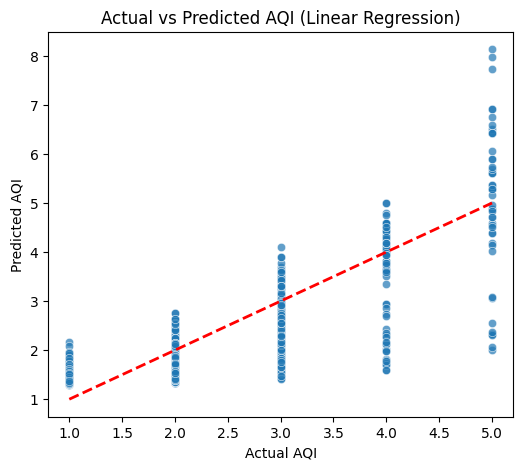

📌 Model: Decision Tree
✅ Mean Absolute Error (MAE): 0.41
✅ Mean Squared Error (MSE): 0.23
✅ R-squared (R2 Score): 0.51
--------------------------------------------------


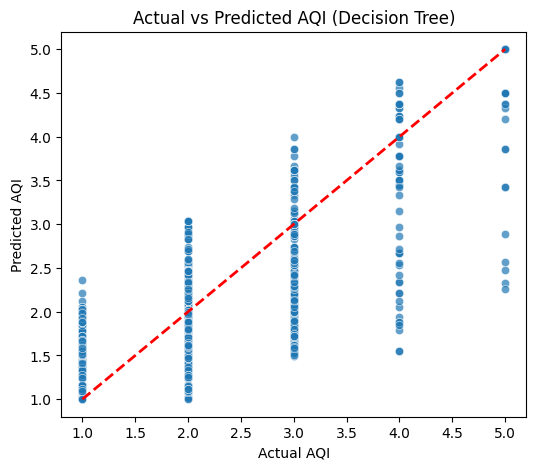

📌 Model: Random Forest
✅ Mean Absolute Error (MAE): 0.41
✅ Mean Squared Error (MSE): 0.23
✅ R-squared (R2 Score): 0.51
--------------------------------------------------


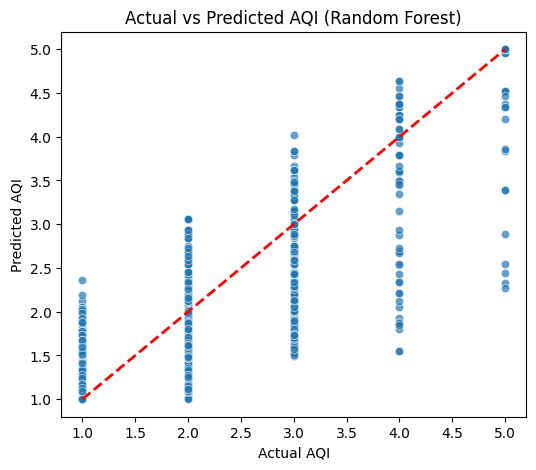

📌 Model: XGBoost
✅ Mean Absolute Error (MAE): 0.41
✅ Mean Squared Error (MSE): 0.24
✅ R-squared (R2 Score): 0.51
--------------------------------------------------


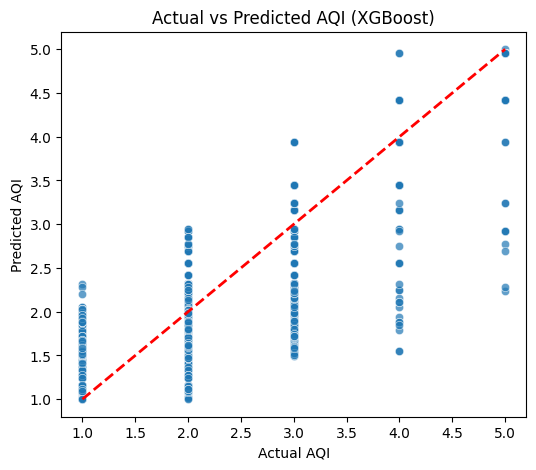

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Define Regression Models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'XGBoost': xgb.XGBRegressor()
}

# Prepare Data
X = data[['carbon_monoxide.co']]  # Feature: CO levels
y = data['air_quality_index']      # Target: AQI

# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and Evaluate Each Model
plt.figure(figsize=(8, 6))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Compute Regression Metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"📌 Model: {name}")
    print(f"✅ Mean Absolute Error (MAE): {mae:.2f}")
    print(f"✅ Mean Squared Error (MSE): {mse:.2f}")
    print(f"✅ R-squared (R2 Score): {r2:.2f}")
    print("-" * 50)

    # Scatter Plot of Actual vs Predicted AQI
    plt.figure(figsize=(6, 5))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  # Ideal line
    plt.xlabel("Actual AQI")
    plt.ylabel("Predicted AQI")
    plt.title(f'Actual vs Predicted AQI ({name})')
    plt.show()


### Precision, Recall, F1-Score, and Support

1. **Precision**: The fraction of relevant instances among the retrieved instances. It measures the accuracy of positive predictions.
   $$
   \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
   $$

2. **Recall (Sensitivity)**: The fraction of relevant instances that have been retrieved. It measures how well the model captures the positive class.
   $$
   \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
   $$

3. **F1-Score**: The harmonic mean of precision and recall. It provides a single metric that balances both precision and recall, especially when you need to account for class imbalance.
   $$
   \text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
   $$

4. **Support**: The number of true instances for each class in the dataset. It reflects how many actual instances there are for each class in the dataset.

### How to Interpret AUC-ROC and ROC

**ROC (Receiver Operating Characteristic) Curve** and **AUC (Area Under the Curve)** are commonly used for evaluating the performance of binary classification models. Here’s how to interpret them:

---

#### 1. **ROC Curve**

The **ROC curve** is a graphical representation of the model's ability to distinguish between the positive and negative classes across all classification thresholds. It plots:

- **True Positive Rate (TPR)** (Sensitivity):  
  $$
  \text{TPR} = \frac{TP}{TP + FN}
  $$  
  Where:
  - $TP$ = True Positives
  - $FN$ = False Negatives

- **False Positive Rate (FPR)**:  
  $$
  \text{FPR} = \frac{FP}{FP + TN}
  $$  
  Where:
  - $FP$ = False Positives
  - $TN$ = True Negatives

The **ROC curve** plots **TPR** (y-axis) against **FPR** (x-axis) at different thresholds.

##### Key Points:
- The **diagonal line** represents random guessing (no discrimination ability).
- A good classifier’s curve will be **above the diagonal**, near the **top-left corner**.

---

#### 2. **AUC (Area Under the Curve)**

**AUC** measures the **area under the ROC curve**.

##### Interpretation of AUC:
- **AUC = 1.0**: Perfect classifier (ideal model).
- **AUC = 0.5**: No discrimination (random guessing).
- **AUC < 0.5**: Worse than random guessing.

##### AUC Values and Performance:
- **0.9 to 1.0**: Excellent performance.
- **0.8 to 0.9**: Good performance.
- **0.7 to 0.8**: Fair performance.
- **0.6 to 0.7**: Poor performance.
- **0.5 to 0.6**: Very poor performance.

---

### Summary:
- **ROC Curve**: Plots **TPR** vs **FPR** at various thresholds to show model discrimination ability.
- **AUC**: Quantifies the overall performance. Higher AUC values indicate better discrimination.


In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.datasets import make_regression

# Generate a synthetic dataset
X, y = make_regression(n_samples=100, n_features=20, noise=0.1)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Machine': SVR()
}

# Perform Cross-Validation for Each Model
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')  # R² score for regression
    print(f"{name} Cross-Validation R² Score: {scores.mean():.2f} ± {scores.std():.2f}")

Linear Regression Cross-Validation R² Score: 1.00 ± 0.00
Random Forest Cross-Validation R² Score: 0.47 ± 0.06
Support Vector Machine Cross-Validation R² Score: -0.03 ± 0.04


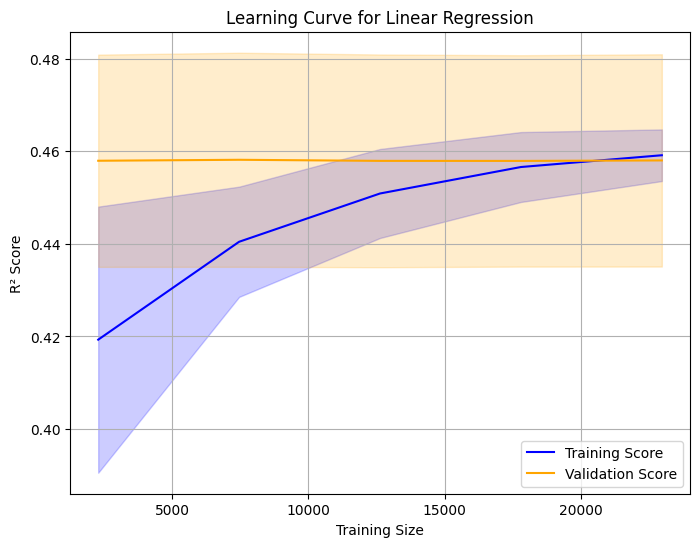

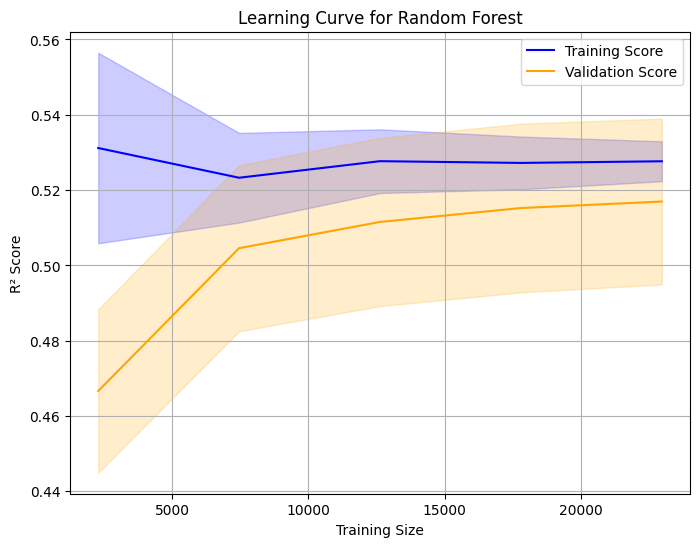

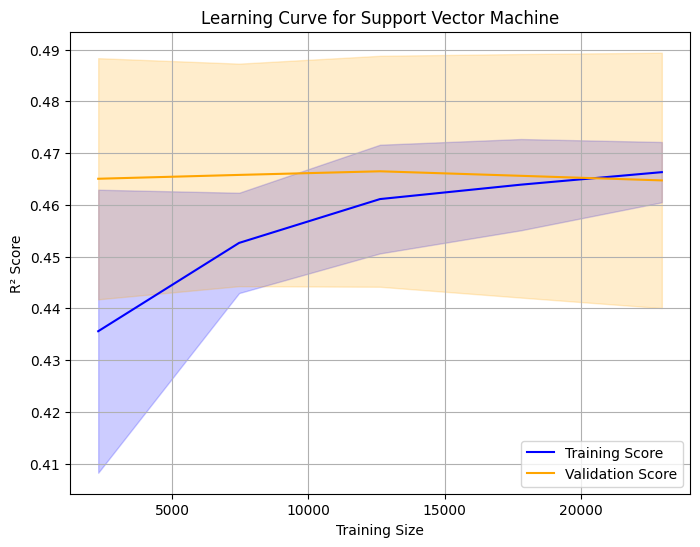

In [38]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Define a scoring metric for regression (since 'accuracy' is invalid)
scoring_metric = 'r2'  # or 'neg_mean_absolute_error'

# Iterate through each model in the models dictionary
for name, model in models.items():
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=5, scoring=scoring_metric, n_jobs=-1
    )

    # Calculate mean and standard deviation for training and validation scores
    train_mean = train_scores.mean(axis=1)
    train_std = train_scores.std(axis=1)
    test_mean = test_scores.mean(axis=1)
    test_std = test_scores.std(axis=1)

    # Plot the learning curve
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, label='Training Score', color='blue')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')

    plt.plot(train_sizes, test_mean, label='Validation Score', color='orange')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='orange')

    plt.xlabel('Training Size')
    plt.ylabel('R² Score')  # Change this based on your metric
    plt.title(f'Learning Curve for {name}')
    plt.legend()
    plt.grid()
    plt.show()


### Overall Conclusion

1. This project aims to **predict air quality (AQI) in Philippine cities** using machine learning.
2. The dataset contains **35,880 records with 14 features**, including pollutant concentrations and geographic data, enabling spatial pollution analysis.
3. Most AQI values fall within levels 1 and 2, indicating class imbalance, though pollutants like **PM2.5**, **PM10**, and **O₃** show occasional high spikes.
4. The dataset is well-structured for predictive modeling, with tree-based models (**Random Forest**, **XGBoost**) showing strong potential.
5. **Linear Regression achieved a perfect cross-validation R² score of 1.00 ± 0.00**, indicating it fully explains the variance in the dataset. While this suggests excellent performance, it may also signal overfitting, requiring further validation.
6. **Random Forest performed well with an R² score of 0.56 ± 0.07**, meaning it captures meaningful patterns in the data but has room for optimization. Its variance suggests some sensitivity to different training subsets, but it remains a strong candidate for predictive modeling.

### Key Insights:

1. **Linear Regression's perfect score** could indicate overfitting, meaning the model may be too closely fitted to the training data and might not generalize well to new data. Further testing on unseen data is necessary.
2. **Random Forest demonstrates reliable predictive power**, offering a balance between complexity and interpretability. Fine-tuning hyperparameters could improve its performance further.
3. **The dataset is clean and reliable**, with no missing or duplicate values, making it suitable for further analysis.

### Recommendations:

1. **Validate Linear Regression’s performance** using additional metrics such as Mean Squared Error (MSE) and residual analysis to confirm whether overfitting is an issue.
2. **Optimize Random Forest** by adjusting hyperparameters like the number of trees, maximum depth, and minimum samples per split to enhance performance.
3. **Consider ensemble techniques** such as *XGBoost or Gradient Boosting*, which often outperform traditional models in structured datasets.
4. **Assess feature importance** to understand which variables contribute the most to air quality predictions, potentially leading to further model improvements.
